In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection

In [2]:
df = pd.read_csv("xAPI-Edu-Data.csv")
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


I'm dropping nationality, location, and parent relations from my dataframe.
I only want to focus on student actions (raisedhands, VisITedResources, AnnouncementsView, Discussion, StudentAbsenceDays, Semester), school status (StageID, GradeID, SectionID, Topic, Class), and gender.

In [3]:
df = df.drop(['NationalITy', 'PlaceofBirth', 'Relation','ParentAnsweringSurvey', 'ParentschoolSatisfaction'], axis = 1)

In [4]:
print(df.columns)

Index(['gender', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester',
       'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'StudentAbsenceDays', 'Class'],
      dtype='object')


In my dataframe, I will change the Class strings L, M, H to numerical values 0.0, 1.0, 2.0. I will also create a new dataframe from df where all values are numerical assigned to continuous_subset.

In [5]:
df['Class'].loc[df.Class == 'L'] = 0.0
df['Class'].loc[df.Class == 'M'] = 1.0
df['Class'].loc[df.Class == 'H'] = 2.0
df.head()

/Users/kimpham/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,gender,StageID,GradeID,SectionID,Topic,Semester,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
0,M,lowerlevel,G-04,A,IT,F,15,16,2,20,Under-7,1
1,M,lowerlevel,G-04,A,IT,F,20,20,3,25,Under-7,1
2,M,lowerlevel,G-04,A,IT,F,10,7,0,30,Above-7,0
3,M,lowerlevel,G-04,A,IT,F,30,25,5,35,Above-7,0
4,M,lowerlevel,G-04,A,IT,F,40,50,12,50,Above-7,1


In [6]:
continuous_subset = df
continuous_subset = continuous_subset.drop(['Class'], axis = 1)

continuous_subset['gender'] = np.where(df['gender']=='M',1,0)

continuous_subset['StageID'].loc[continuous_subset.StageID == 'lowerlevel'] = 0 
continuous_subset['StageID'].loc[continuous_subset.StageID == 'MiddleSchool'] = 1
continuous_subset['StageID'].loc[continuous_subset.StageID == 'HighSchool'] = 2

continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-01'] = 0
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-02'] = 1
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-03'] = 2
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-04'] = 3
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-05'] = 4
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-06'] = 5
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-07'] = 6
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-08'] = 7
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-09'] = 8
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-10'] = 9
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-11'] = 10
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-12'] = 11

continuous_subset['SectionID'].loc[continuous_subset.SectionID == 'A'] = 0
continuous_subset['SectionID'].loc[continuous_subset.SectionID == 'B'] = 1
continuous_subset['SectionID'].loc[continuous_subset.SectionID == 'C'] = 2

continuous_subset['Topic'].loc[continuous_subset.Topic == 'IT'] = 0
continuous_subset['Topic'].loc[continuous_subset.Topic == 'Math'] = 1 
continuous_subset['Topic'].loc[continuous_subset.Topic == 'Arabic'] = 2
continuous_subset['Topic'].loc[continuous_subset.Topic == 'Science'] = 3
continuous_subset['Topic'].loc[continuous_subset.Topic == 'English'] = 4
continuous_subset['Topic'].loc[continuous_subset.Topic == 'Quran'] = 5
continuous_subset['Topic'].loc[continuous_subset.Topic == 'Spanish'] = 6 
continuous_subset['Topic'].loc[continuous_subset.Topic == 'French'] = 7
continuous_subset['Topic'].loc[continuous_subset.Topic == 'History'] = 8
continuous_subset['Topic'].loc[continuous_subset.Topic == 'Biology'] = 9
continuous_subset['Topic'].loc[continuous_subset.Topic == 'Chemistry'] = 10 
continuous_subset['Topic'].loc[continuous_subset.Topic == 'Geology'] = 11

continuous_subset['Semester'] = np.where(df['Semester']=='F',1,0)
continuous_subset['StudentAbsenceDays'] = np.where(df['StudentAbsenceDays']=='Under-7',1,0)

/Users/kimpham/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
continuous_subset.head()

,gender,StageID,GradeID,SectionID,Topic,Semester,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays
0,1,0,3,0,0,1,15,16,2,20,1
1,1,0,3,0,0,1,20,20,3,25,1
2,1,0,3,0,0,1,10,7,0,30,0
3,1,0,3,0,0,1,30,25,5,35,0
4,1,0,3,0,0,1,40,50,12,50,0


I will assign the subsets to Y and X as arrays to use for training and testing.

In [8]:
y = np.array(df['Class']).astype('float64')
X = np.array(continuous_subset).astype('float64')
X.shape

(480, 11)

## Logistic Regression

We will start with logistic regression to model binary outcomes. 
"Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes)" (https://www.medcalc.org/manual/logistic_regression.php). 


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(
         X, y)

# Fit the model on the training data.
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Print the accuracy from the training data.
print(accuracy_score(lr.predict(X_train), y_train))

0.752777777778


## Random Forest Classifier

"A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting" (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)

yf = rf.predict(X_test)

accuracy_score = rf.score(X_test, y_test)
accuracy_score


0.7583333333333333

## K-fold cross-validation

"In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:
A model is trained using k-1 of the folds as training data;
the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).
The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as it is the case when fixing an arbitrary test set), which is a major advantage in problem such as inverse inference where the number of samples is very small" (http://scikit-learn.org/stable/modules/cross_validation.html).

In [28]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, X, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(X): # split data into train/test groups, 5 times
        clf.fit(X_train, y_train) # fit
        result += score_func(clf.predict(X_test), y_test) # evaluate score function on held-out data
    return result / nfold # average

In [29]:
clf = LogisticRegression()
score = cv_score(clf, X_train, y_train)
print(score)

0.725


## Plot for Feature Importances

Source: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [20]:
# Compute the feature importances of rf, fitted on X_train, y_train
importances = rf.feature_importances_
print(importances)

std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

[ 0.03552748  0.01255773  0.04365835  0.02110088  0.05785758  0.01833073
  0.20682175  0.22098825  0.14429072  0.10590737  0.13295916]


Feature ranking:
1. feature 7 (0.220988)
2. feature 6 (0.206822)
3. feature 8 (0.144291)
4. feature 10 (0.132959)
5. feature 9 (0.105907)
6. feature 4 (0.057858)
7. feature 2 (0.043658)
8. feature 0 (0.035527)
9. feature 3 (0.021101)
10. feature 5 (0.018331)
11. feature 1 (0.012558)


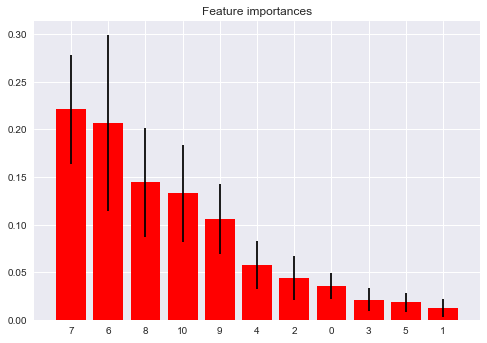

In [19]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

The Feature Importances plotting indicates the top three most important features are: 
1. feature 7 (0.220988) - VisITedResources
2. feature 6 (0.206822) - raisedhands
3. feature 8 (0.144291) - AnnouncementsView

and the three least most important features are:
9. feature 3 (0.021101) - SectionID
10. feature 5 (0.018331) - Semester
11. feature 1 (0.012558) - StageID

LMS actions such as VisITedResources or AnnouncementsView and in class actions e.g. raisedhands were ranked as important features to overall class grade, whereas school status characteristics e.g. SectionID,  Semester, and StageID.

This paints the story that across different school status charateristics and gender, an individual's active participation in their education could affect their class grade outcome.

## Pairplot


"By default, this function will create a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.
It is also possible to show a subset of variables or plot different variables on the rows and columns" http://seaborn.pydata.org/generated/seaborn.pairplot.html.

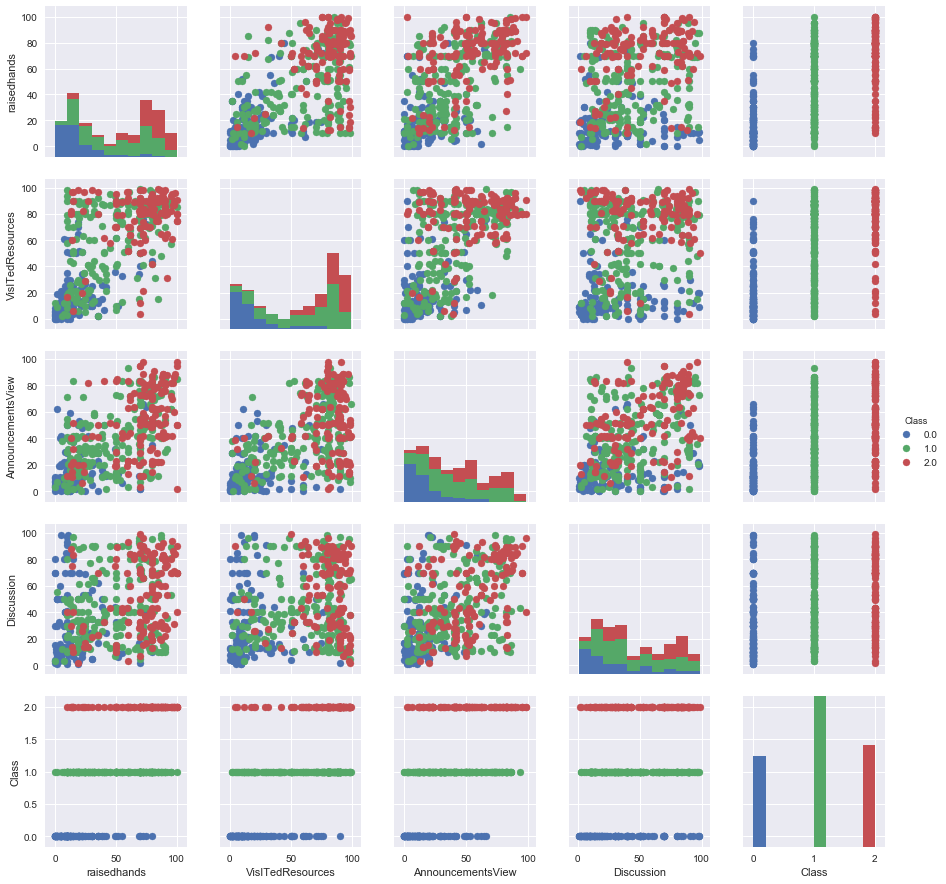

In [17]:
g = sns.PairGrid(df, hue="Class")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()
plt.show()

Focusing on technology usage, I'm observing from the Pairplot that those with higher grade class (2.0) use technology more than those with the lower grade class (0.0). Those with a grade class of 1.0 exist at both ends of the spectrum where technology is used and not used.

I'm also observing that those with the lower grade class (0.0) tend to cluster towards the bottom left hand corner of the graphs, which indicates less student activity in technology or in classroom activity, such as raisedhands.


## Conclusion

I used three different supervised classification methods: Logistic Regression, Random Forest, and K-Fold Cross Validation. I achieved an accuracy score of .75, .75, and .72. 

I focused on two different graphs: Feature Importances and Pairplot. My graphs showed that those with a higher class grade (2.0) had a higher participation in technology usage with the LMS and classroom activity such as raisedhands than those with the lower class grade (0.0). This indicates that the individual participation of the student matters in relation to receiving a higher class grade instead of a lower class grade.

This finding might support the idea that resources are critical in achieving high scores in the education space. We might consider identifying the reasons behind why resources are not being used by students, if it is true resources impact the class grade received. For example some questions might be: do students have access to technology resources, and what might be preventing students from raising their hand in class?

It's also interesting how the least important features were school status characteristics such as StageID and Semester. This would support the idea that doing well in the education space has more to do with individual pursuit than the existing structure of the education space.